In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *

In [2]:
diamantes = pd.read_csv('./input/diamonds_train.csv')
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [3]:
diamantes.shape

(40345, 11)

In [4]:
diamantes.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
diamantes.describe()

,id,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,20172.000000,0.797699,61.749721,57.449421,5.730824,5.734808,3.537958,3931.902243
std,11646.742642,0.474309,1.427728,2.234087,1.121767,1.151536,0.695039,3994.318832
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,952.000000
50%,20172.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000
75%,30258.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,5317.000000
max,40344.000000,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000,18823.000000


In [6]:
correlacionDiamantes = diamantes.corr()

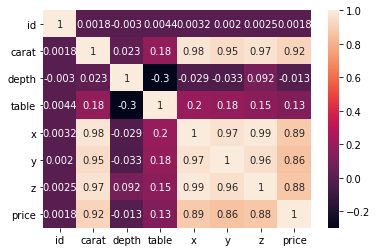

In [7]:
import seaborn as sns
ax_corr = sns.heatmap(correlacionDiamantes, annot = True)

In [8]:
print(diamantes.dtypes)

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [9]:
diamantes.describe(include=object)

,cut,color,clarity
count,40345,40345,40345
unique,5,7,8
top,Ideal,G,SI1
freq,16141,8462,9710


In [10]:
def modificaciones(x):
    for a,b in modif_num.items():
        if x==a:
            x=b
            return x
    return x

In [11]:
modif_num = {"D":1, "E":1, "F":2, "G":2, "H":3, "I":4, "J":4}
diamantes.color = diamantes.color.apply(modificaciones)

modif_num = {"IF":1, "VVS1":2, "VVS2":2, "VS1":3, "VS2":3, "SI1":4, "SI2":4, "I1":5}
diamantes.clarity = diamantes.clarity.apply(modificaciones)

modif_num = {"Ideal":1, "Premium":2, "Very Good":3, "Good":4, "Fair":5}
diamantes.cut = diamantes.cut.apply(modificaciones)

In [12]:
newCorr = diamantes.corr()

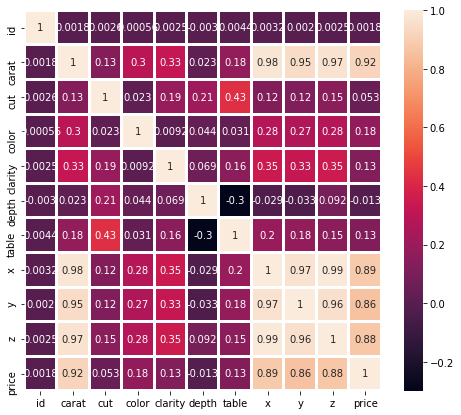

In [13]:
import matplotlib.pyplot as plt
fig, ax_newCorr = plt.subplots(figsize=(8,7))  
ax_newCorr = sns.heatmap(newCorr, annot = True, linewidths=2)

In [14]:
X = diamantes[["carat", "cut", "color", "clarity", "depth", "table"]]#, "x", "y", "z"]]
y = diamantes["price"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(shuffle=True, random_state=20)

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
models = {
    "Linear": LinearSVR(),
    "neighbors": KNeighborsRegressor(),
    "histboosting": HistGradientBoostingRegressor(),
    "histboosting0.2": HistGradientBoostingRegressor(learning_rate=0.2),
    "forest300,50": RandomForestRegressor(n_estimators=300, max_depth=50)
}
for name, model in models.items():
#    scores = cross_val_score(model, X, y, cv=10)
#    print(f"({name}) acccuracy={np.mean(scores)}")
    
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    print(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=kfold, n_jobs=2)))

Training model: Linear
0.7428226904419002
Training model: neighbors
0.8377489889492539
Training model: histboosting
0.9700467287139516
Training model: histboosting0.2
0.9695848200418273
Training model: forest300,50
0.9675738290569033


# Luego de entrenar el modelo paso ahora a limpiar el dataset del test. Que es lo que haré a continuación:

In [19]:
diamantesTest = pd.read_csv('./input/diamonds_test.csv')
diamantesTest.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [20]:
def modificaciones(x):
    for a,b in modif_num.items():
        if x==a:
            x=b
            return x
    return x

In [21]:
modif_num = {"D":1, "E":1, "F":2, "G":2, "H":3, "I":4, "J":4}
diamantesTest.color = diamantesTest.color.apply(modificaciones)

modif_num = {"IF":1, "VVS1":2, "VVS2":2, "VS1":3, "VS2":3, "SI1":4, "SI2":4, "I1":5}
diamantesTest.clarity = diamantesTest.clarity.apply(modificaciones)

modif_num = {"Ideal":1, "Premium":2, "Very Good":3, "Good":4, "Fair":5}
diamantesTest.cut = diamantesTest.cut.apply(modificaciones)

In [22]:
diamantesTestX = diamantesTest[["carat", "cut", "color", "clarity", "depth", "table"]]#, "x", "y", "z"]]

# Modelo 1: HistGradientBoostingRegressor

In [23]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
diamantes_HGBR = HistGradientBoostingRegressor()
diamantes_HGBR.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [24]:
from sklearn.metrics import r2_score
pricePredictHGBR = diamantes_HGBR.predict(diamantesTestX)
pricePredictHGBR

array([ 4782.66354893,  1085.84513142, 16250.12660506, ...,
         542.0851491 ,   755.60635382,  1886.97308124])

In [25]:
print('RMSE HistGradientBoostingRegressor ->', np.sqrt(mean_squared_error(y_test, diamantes_HGBR.predict(X_test))))
print(np.mean(cross_val_score(HistGradientBoostingRegressor(), X_train, y_train, scoring='r2', cv=kfold, n_jobs=2)))
print('R2', r2_score(y_test, diamantes_HGBR.predict(X_test)))

RMSE HistGradientBoostingRegressor -> 699.8966228320277
0.9700467287139516
R2 0.9693980780988547


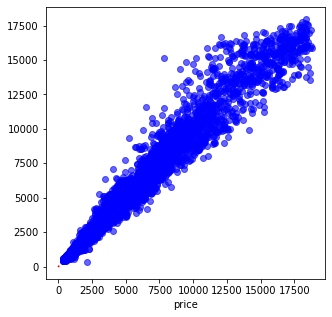

In [26]:
plt.figure(figsize=(5,5))
sns.regplot(y_test, diamantes_HGBR.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

# Modelo 2: HistGradientBoostingRegressor (con learning rate 0.2)

In [27]:
diamantes_HGBR2 = HistGradientBoostingRegressor(learning_rate=0.2)
diamantes_HGBR2.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.2,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [28]:
pricePredictHGBR2 = diamantes_HGBR2.predict(diamantesTestX)
pricePredictHGBR2

array([ 4720.58426227,  1075.14061128, 16132.93056986, ...,
         515.77001807,   719.47400191,  1922.70205514])

In [29]:
print('RMSE HistGradientBoostingRegressor Learning_rate 0.2 ->', np.sqrt(mean_squared_error(y_test, diamantes_HGBR2.predict(X_test))))
print('R2', r2_score(y_test, diamantes_HGBR2.predict(X_test)))

RMSE HistGradientBoostingRegressor Learning_rate 0.2 -> 709.9531818999492
R2 0.968512344408955


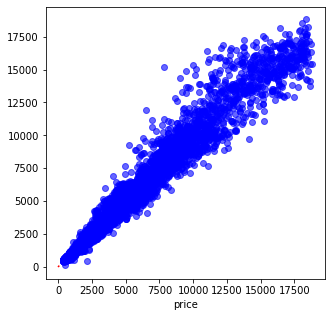

In [30]:
plt.figure(figsize=(5,5))
sns.regplot(y_test, diamantes_HGBR2.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

# Modelo 3: RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
diamantes_RandomForest = RandomForestRegressor(n_estimators=300, max_depth=50)
diamantes_RandomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
pricePredictRF = diamantes_RandomForest.predict(diamantesTestX)
pricePredictRF

array([ 5003.09527778,  1003.75916667, 16167.39333333, ...,
         526.95666667,   662.70943651,  1789.47980952])

In [33]:
print('RMSE RandomForestRegressor ->', np.sqrt(mean_squared_error(y_test, diamantes_RandomForest.predict(X_test))))
print('R2', r2_score(y_test, diamantes_RandomForest.predict(X_test)))

RMSE RandomForestRegressor -> 720.6919119939895
R2 0.9675525775634369


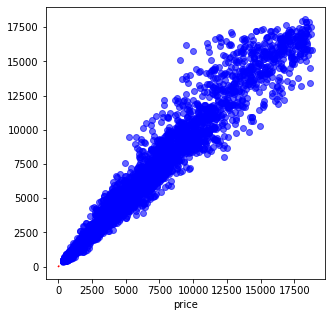

In [34]:
plt.figure(figsize=(5,5))
sns.regplot(y_test, diamantes_RandomForest.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

# Modelo 4: KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsRegressor
diamantes_KNeigh = KNeighborsRegressor(n_neighbors=3)
diamantes_KNeigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [36]:
pricePredictKN = diamantes_KNeigh.predict(diamantesTestX)
pricePredictKN

array([ 4946.        ,  1547.33333333, 16600.66666667, ...,
         515.        ,   700.66666667,  1953.33333333])

In [37]:
print('RMSE KNeighborsRegressor ->', np.sqrt(mean_squared_error(y_test, diamantes_KNeigh.predict(X_test))))
print('R2', r2_score(y_test, diamantes_KNeigh.predict(X_test)))

RMSE KNeighborsRegressor -> 1485.0623988156487
R2 0.8622250345783566


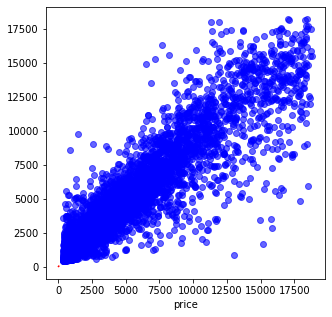

In [38]:
plt.figure(figsize=(5,5))
sns.regplot(y_test, diamantes_KNeigh.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

# Modelo 5: Linear SVR

In [39]:
from sklearn.svm import LinearSVR
diamantes_SVR = LinearSVR()
diamantes_SVR.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [40]:
pricePredictSVR = diamantes_SVR.predict(diamantesTestX)
pricePredictSVR

array([ 4747.76584075,  1350.59749493, 10097.84443276, ...,
         442.89959408,   697.73534096,  2012.77832537])

In [41]:
print('RMSE LinearSVR ->', np.sqrt(mean_squared_error(y_test, diamantes_SVR.predict(X_test))))
print('R2', r2_score(y_test, diamantes_SVR.predict(X_test)))

RMSE LinearSVR -> 1926.2735471199896
R2 0.7681981872813657


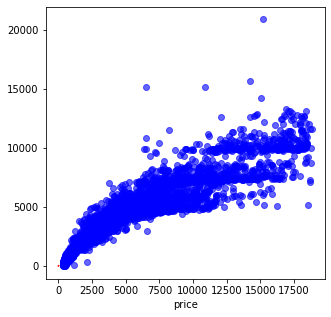

In [42]:
plt.figure(figsize=(5,5))
sns.regplot(y_test, diamantes_SVR.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

# Lo siguiente es para agregar la columna que se está prediciendo y exportar el csv para poder subirlo a Kaggle

In [49]:
#diamantesTestX['price'] = pricePredictHGBR

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
#pPredictHGBR = diamantesTestX[['price']]

In [51]:
#pPredictHGBR.index.name = 'id'

In [52]:
#pPredictHGBR.to_csv('first_Price1.csv')